In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, f1_score,classification_report
from random import randint, shuffle
import os
import seaborn as sns




In [2]:
# cluster0のtrain_dataとtest_dataを読み込み
train_data_cluster1 = pd.read_csv('Desktop/インテグ課題/NASA/train_data/train_data_cluster1.csv')
test_data_cluster1 = pd.read_csv('Desktop/インテグ課題/NASA/test_data/test_data_cluster1.csv')

# test_dataのRUL（答え）をclusterごとに分けて、他必要な処理を行ったファイルを読み込む

In [3]:
test_data_RUL_cluster1 = pd.read_csv('Desktop/インテグ課題/NASA/test_data/test_data_RUL_cluster1.csv')

# cluster1

In [4]:
#重複した行を削除
list_engine_no_train_data_cluster1 = list(train_data_cluster1['engine_no'].drop_duplicates())

In [5]:
list_engine_no_train_data_cluster1

[5,
 7,
 9,
 13,
 16,
 19,
 21,
 22,
 25,
 30,
 34,
 53,
 54,
 56,
 57,
 59,
 69,
 70,
 71,
 72,
 74,
 78,
 82,
 84,
 86,
 87,
 90,
 91,
 93,
 101,
 106,
 118,
 122,
 124,
 130,
 135,
 138,
 139,
 141,
 146,
 149,
 150,
 154,
 156,
 158,
 160,
 167,
 178,
 183,
 185,
 193,
 196,
 198,
 201,
 205,
 207,
 214,
 215,
 216,
 230,
 231,
 233,
 234,
 236,
 238,
 244,
 247,
 248,
 252,
 254,
 259,
 262,
 263,
 264,
 274,
 282,
 288,
 293,
 295,
 302,
 303,
 304,
 310,
 311,
 314,
 320,
 323,
 326,
 327,
 332,
 334,
 336,
 338,
 347,
 352,
 353,
 357,
 358,
 360,
 363,
 365,
 371,
 373,
 375,
 376,
 378,
 382,
 385,
 389,
 390,
 393,
 394,
 395,
 397,
 398,
 404,
 405,
 410,
 415,
 416,
 418,
 421,
 423,
 425,
 426,
 429,
 438,
 444,
 445,
 453,
 457,
 459,
 460,
 463,
 468,
 473,
 475,
 477,
 478,
 481,
 482,
 484,
 489,
 496,
 502,
 507,
 513,
 519,
 521,
 528,
 529,
 533,
 536,
 539,
 541,
 545,
 557,
 573,
 575,
 577,
 581,
 586,
 588,
 598,
 600,
 601,
 606,
 611,
 613,
 617,
 621,
 623,


In [6]:
# 特徴量を抽出　上記の欠損値以外を抽出
metadata_columns = ['engine_no', 'time_in_cycles']
selected_features = [x for x in test_data_cluster1.columns if x not in metadata_columns]

#  特徴量選択をやり直す際はここから行う

In [7]:
selected_features

['op_setting_1',
 'op_setting_2',
 'op_setting_3',
 'sensor_1',
 'sensor_2',
 'sensor_3',
 'sensor_4',
 'sensor_5',
 'sensor_6',
 'sensor_7',
 'sensor_8',
 'sensor_9',
 'sensor_10',
 'sensor_11',
 'sensor_12',
 'sensor_13',
 'sensor_14',
 'sensor_15',
 'sensor_16',
 'sensor_17',
 'sensor_18',
 'sensor_19',
 'sensor_20',
 'sensor_21']

#  ここで特徴量を入れていくので、特徴量選択をし直した後はここからやり直す

In [8]:
#大元のtrainをx(selected_features)とy(RUL)に分ける
X_train_all_cluster1, y_train_all_cluster1 = train_data_cluster1[selected_features], train_data_cluster1['RUL']

In [9]:
#大元のtestの特徴量からselected_featuresだけのX_testにする
X_test_cluster1 = test_data_cluster1[selected_features]

## ランダムフォレスト　欠損値の列のみ除く

In [10]:
#ランダムフォレスト
rf_cluster1 = RandomForestRegressor(random_state=1234)
rf_cluster1.fit(X_train_all_cluster1, y_train_all_cluster1)


# FutureWarningは問題ありません

C:\Users\81907\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1234,
                      verbose=0, warm_start=False)

# 注意　最後は結合するので、列名はpred_rfで統一する

In [11]:
#予測する
test_data_cluster1['pred_rf'] = rf_cluster1.predict(X_test_cluster1)

In [12]:
test_data_cluster1.head()

,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,pred_rf
0,9,1,-0.0009,-0.0001,100.0,518.67,642.06,1590.15,1408.02,14.62,...,2388.08,8126.75,8.4314,0.03,393,2388,100.0,38.90,23.3147,132.7
1,9,2,0.0031,-0.0002,100.0,518.67,642.74,1584.08,1413.33,14.62,...,2388.08,8131.25,8.4829,0.03,392,2388,100.0,38.70,23.3071,149.9
2,9,3,0.0023,-0.0001,100.0,518.67,642.48,1591.55,1407.27,14.62,...,2388.10,8129.61,8.4557,0.03,394,2388,100.0,38.92,23.3058,123.7
3,9,4,0.0033,-0.0004,100.0,518.67,642.15,1587.86,1406.12,14.62,...,2388.06,8137.89,8.4270,0.03,394,2388,100.0,38.88,23.3084,126.3
4,9,5,0.0005,-0.0003,100.0,518.67,642.47,1591.80,1407.10,14.62,...,2388.11,8132.09,8.3875,0.03,389,2388,100.0,38.85,23.3685,155.0


# 注意　最後は結合するので、列名はpred_rfで統一する

In [13]:
#結果表の作成 
train_data_cluster1 = train_data_cluster1.sort_values(['engine_no', 'time_in_cycles'])
test_data_cluster1 = test_data_cluster1.sort_values(['engine_no', 'time_in_cycles'])

#test_dataの各engineの最後のサイクルの行のみを表示　列は'engine_no', 'pred_rf'のみ
result_cluster1 = test_data_cluster1.groupby('engine_no').last().reset_index()[['engine_no', 'pred_rf']]



In [14]:
result_cluster1.head()

,engine_no,pred_rf
0,9,134.1
1,10,186.2
2,15,42.5
3,18,144.8
4,26,97.4


In [15]:
# pred_rf<100の時、つまり予測した残りの寿命サイクルが100より小さければ1 それ以外で0とする
result_cluster1['result'] = result_cluster1['pred_rf'].map(lambda x: 0 if x > 100 else 1)

#lambda:無名関数（匿名関数）は文字通り名前のない関数で、一度きりの使い捨ての関数として使います。無名関数を使うと処理を簡潔に書けたり、グローバル・スコープの関数（オブジェクト）を生成せずに済むといったメリットがあります。
#組み込み関数map()と無名関数lambda（ラムダ式）とをあわせて使うと、リストの要素すべてを２倍する、（文字列要素を）一括置換する、といったようにリスト要素すべてに変更を加えたオブジェクトを取得することができます。

In [16]:
result_cluster1.head()

,engine_no,pred_rf,result
0,9,134.1,0
1,10,186.2,0
2,15,42.5,1
3,18,144.8,0
4,26,97.4,1


In [17]:
#csvで結果の保存
result_cluster1[['engine_no', 'result']].to_csv('Desktop/インテグ課題/NASA/cluster1_submission1.csv', index=False)

# 上記で読み込んだtest_data_RUL_cluster1を使っていく

In [18]:
test_data_RUL_cluster1.head()

,engine_no,RUL,result
0,9,93,1
1,10,120,0
2,15,55,1
3,18,99,1
4,26,93,1


# train_allで学習しtestデータで出した予測値と、実際の答えで混合行列を作成

In [19]:
print((result_cluster1['result'] == 1).sum())
print((result_cluster1['result'] == 0).sum())

99
101


In [20]:
print((test_data_RUL_cluster1['result'] == 1).sum())
print((test_data_RUL_cluster1['result'] == 0).sum())

135
65


# 100以内に故障するを1,しないを0としている 故障することを当てたいから、故障する1をpositiveと定義する。

In [21]:
#混合行列
#1 = Positive,0 = Negativeとする　なぜならば、再現率などがpositiveで計算されるので、故障するをpositiveにする
#labels指定をしないと、左から0,1表記になるので、TPが右下になってしまう。
cm = confusion_matrix(test_data_RUL_cluster1['result'],result_cluster1['result'],labels=[1, 0] )

In [22]:
cm

array([[95, 40],
       [ 4, 61]], dtype=int64)

# 列が予測の1と0行が実際の1と0つまり、真陽性 : TP (True-Positive)233、真陰性: TN (True-Negative)177、偽陽性: FP (False-Positive)15(故障していないのにしていると予測)、偽陰性: FN (False-Negative)82(実際は故障しているのに故障していないと予測)
#https://pythondatascience.plavox.info/scikit-learn/%E5%88%86%E9%A1%9E%E7%B5%90%E6%9E%9C%E3%81%AE%E3%83%A2%E3%83%87%E3%83%AB%E8%A9%95%E4%BE%A1
#FN (False-Negative)82を少なくしたい　つまり実際は故障だが、故障しないと判断してしまっているものを

In [23]:
#混合行列まとめて表示
cr = classification_report(test_data_RUL_cluster1['result'],result_cluster1['result'],labels=[1, 0] )
print(cr)

              precision    recall  f1-score   support

           1       0.96      0.70      0.81       135
           0       0.60      0.94      0.73        65

    accuracy                           0.78       200
   macro avg       0.78      0.82      0.77       200
weighted avg       0.84      0.78      0.79       200



# labelsを付けた時の計算が上記のまとめて表示の1の方　labelsをつけなかったときの計算が下の方

# #再現率を上げたい　実際の故障のうち故障と予測できたもの

In [24]:
#特徴量の重要度を算出
feature_importances_cluster1 = rf_cluster1.feature_importances_


feature_importance_cluster1 = \
    pd.DataFrame(rf_cluster1.feature_importances_, columns=["importance"], index=selected_features)
feature_importance_cluster1.sort_values("importance", ascending=False)

#全部足すと100% 縦軸で
#これでは重要度はわかるが、回帰のように上がる下がるなど関係性はわからない

,importance
sensor_11,0.457321
sensor_12,0.119188
sensor_9,0.081265
sensor_14,0.040751
sensor_4,0.040458
sensor_7,0.034064
sensor_6,0.026515
sensor_15,0.026315
sensor_21,0.026124
sensor_3,0.025835


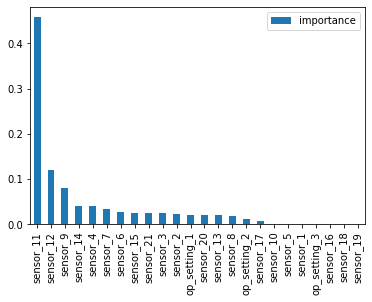

In [25]:
feature_importance_cluster1.sort_values("importance", ascending=False).plot(kind="bar")

##特徴量は\
sensor_10	0.000116\
sensor_5	0.000000\
sensor_1	0.000000\
op_setting_3	0.000000\
sensor_16	0.000000\
sensor_18	0.000000\
sensor_19	0.000000\
はほとんど意味がないと推測できる

# ランダムフォレスト　最初の欠損値に加え、上記の特徴量を削る

In [26]:
selected_features

['op_setting_1',
 'op_setting_2',
 'op_setting_3',
 'sensor_1',
 'sensor_2',
 'sensor_3',
 'sensor_4',
 'sensor_5',
 'sensor_6',
 'sensor_7',
 'sensor_8',
 'sensor_9',
 'sensor_10',
 'sensor_11',
 'sensor_12',
 'sensor_13',
 'sensor_14',
 'sensor_15',
 'sensor_16',
 'sensor_17',
 'sensor_18',
 'sensor_19',
 'sensor_20',
 'sensor_21']

In [27]:
serected_features_importance_cluster1 = selected_features
serected_features_importance_cluster1.remove('sensor_10')

In [28]:
serected_features_importance_cluster1.remove('sensor_5')

In [29]:
serected_features_importance_cluster1.remove('sensor_1')

In [30]:
serected_features_importance_cluster1.remove('op_setting_3')

In [31]:
serected_features_importance_cluster1.remove('sensor_16')

In [32]:
serected_features_importance_cluster1.remove('sensor_18')

In [33]:
serected_features_importance_cluster1.remove('sensor_19')

In [34]:
serected_features_importance_cluster1

['op_setting_1',
 'op_setting_2',
 'sensor_2',
 'sensor_3',
 'sensor_4',
 'sensor_6',
 'sensor_7',
 'sensor_8',
 'sensor_9',
 'sensor_11',
 'sensor_12',
 'sensor_13',
 'sensor_14',
 'sensor_15',
 'sensor_17',
 'sensor_20',
 'sensor_21']

In [35]:
#大元のtrainをx(selected_features)とy(RUL)に分ける
X_train_all_cluster1_rf_fe_im, y_train_all_cluster1_rf_fe_im = train_data_cluster1[serected_features_importance_cluster1], train_data_cluster1['RUL']

In [36]:
#大元のtestの特徴量からselected_featuresだけのX_test_rf_fe_imにする
X_test_cluster1_rf_fe_im = test_data_cluster1[serected_features_importance_cluster1]

In [37]:
#ランダムフォレスト
rf_cluster1_fe_im = RandomForestRegressor(random_state=1234)
rf_cluster1_fe_im.fit(X_train_all_cluster1_rf_fe_im, y_train_all_cluster1_rf_fe_im)


# FutureWarningは問題ありません

C:\Users\81907\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1234,
                      verbose=0, warm_start=False)

# 注意　最後は結合するので、列名はpred_rf_fe_imで統一する 


In [38]:
#予測する
train_data_cluster1['pred_rf_fe_im'] = rf_cluster1_fe_im.predict(X_train_all_cluster1_rf_fe_im)
test_data_cluster1['pred_rf_fe_im'] = rf_cluster1_fe_im.predict(X_test_cluster1_rf_fe_im)

In [39]:
test_data_cluster1.head()

,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,pred_rf,pred_rf_fe_im
0,9,1,-0.0009,-0.0001,100.0,518.67,642.06,1590.15,1408.02,14.62,...,8126.75,8.4314,0.03,393,2388,100.0,38.90,23.3147,132.7,123.2
1,9,2,0.0031,-0.0002,100.0,518.67,642.74,1584.08,1413.33,14.62,...,8131.25,8.4829,0.03,392,2388,100.0,38.70,23.3071,149.9,144.2
2,9,3,0.0023,-0.0001,100.0,518.67,642.48,1591.55,1407.27,14.62,...,8129.61,8.4557,0.03,394,2388,100.0,38.92,23.3058,123.7,121.6
3,9,4,0.0033,-0.0004,100.0,518.67,642.15,1587.86,1406.12,14.62,...,8137.89,8.4270,0.03,394,2388,100.0,38.88,23.3084,126.3,131.9
4,9,5,0.0005,-0.0003,100.0,518.67,642.47,1591.80,1407.10,14.62,...,8132.09,8.3875,0.03,389,2388,100.0,38.85,23.3685,155.0,165.0


In [40]:
#結果表の作成 
train_data_cluster1 = train_data_cluster1.sort_values(['engine_no', 'time_in_cycles'])
test_data_cluster1 = test_data_cluster1.sort_values(['engine_no', 'time_in_cycles'])

#test_dataの各engineの最後のサイクルの行のみを表示　列は'engine_no', 'pred_rf'のみ
result_cluster1_rf_fe_im = test_data_cluster1.groupby('engine_no').last().reset_index()[['engine_no', 'pred_rf_fe_im']]



In [41]:
result_cluster1_rf_fe_im.head()

,engine_no,pred_rf_fe_im
0,9,129.3
1,10,188.0
2,15,48.0
3,18,158.3
4,26,104.8


In [42]:
# pred_rf<100の時、つまり予測した残りの寿命サイクルが100より小さければ1 それ以外で0とする
result_cluster1_rf_fe_im['result'] = result_cluster1_rf_fe_im['pred_rf_fe_im'].map(lambda x: 0 if x > 100 else 1)

In [43]:
result_cluster1_rf_fe_im.head()
# result_cluster1_rf_fe_im = result_cluster1_rf_fe_im.drop("resul_cluster1t", axis=1)

,engine_no,pred_rf_fe_im,result
0,9,129.3,0
1,10,188.0,0
2,15,48.0,1
3,18,158.3,0
4,26,104.8,0


In [44]:
#csvで結果の保存
result_cluster1[['engine_no', 'result']].to_csv('Desktop/インテグ課題/NASA/cluster1_submission2.csv', index=False)

# 上記で読み込んだtest_data_RUL_cluster1を使っていく

In [45]:
test_data_RUL_cluster1.head()

,engine_no,RUL,result
0,9,93,1
1,10,120,0
2,15,55,1
3,18,99,1
4,26,93,1


# train_allで学習しtestデータで出した予測値と、実際の答えで混合行列を作成

In [46]:
print((result_cluster1_rf_fe_im['result'] == 1).sum())
print((result_cluster1_rf_fe_im['result'] == 0).sum())

99
101


In [47]:
print((test_data_RUL_cluster1['result'] == 1).sum())
print((test_data_RUL_cluster1['result'] == 0).sum())

135
65


# 100以内に故障するを1,しないを0としている 故障することを当てたいから、故障する1をpositiveと定義する。

In [48]:
#混合行列
#1 = Positive,0 = Negativeとする　なぜならば、再現率などがpositiveで計算されるので、故障するをpositiveにする
#labels指定をしないと、左から0,1表記になるので、TPが右下になってしまう。
cm = confusion_matrix(test_data_RUL_cluster1['result'],result_cluster1_rf_fe_im['result'],labels=[1, 0] )

In [49]:
cm

array([[95, 40],
       [ 4, 61]], dtype=int64)

# 列が予測の1と0行が実際の1と0つまり、真陽性 : TP (True-Positive)233、真陰性: TN (True-Negative)177、偽陽性: FP (False-Positive)15(故障していないのにしていると予測)、偽陰性: FN (False-Negative)82(実際は故障しているのに故障していないと予測)
#https://pythondatascience.plavox.info/scikit-learn/%E5%88%86%E9%A1%9E%E7%B5%90%E6%9E%9C%E3%81%AE%E3%83%A2%E3%83%87%E3%83%AB%E8%A9%95%E4%BE%A1
#FN (False-Negative)82を少なくしたい　つまり実際は故障だが、故障しないと判断してしまっているものを

In [50]:
#混合行列まとめて表示
cr = classification_report(test_data_RUL_cluster1['result'],result_cluster1_rf_fe_im['result'],labels=[1, 0] )
print(cr)

              precision    recall  f1-score   support

           1       0.96      0.70      0.81       135
           0       0.60      0.94      0.73        65

    accuracy                           0.78       200
   macro avg       0.78      0.82      0.77       200
weighted avg       0.84      0.78      0.79       200



# labelsを付けた時の計算が上記のまとめて表示の1の方　labelsをつけなかったときの計算が下の方

# #再現率を上げたい　実際の故障のうち故障と予測できたもの

In [51]:
#特徴量の重要度を算出
feature_importances_cluster1_rf_fe_im = rf_cluster1_fe_im.feature_importances_


feature_importance_cluster1_rf_fe_im = \
    pd.DataFrame(rf_cluster1_fe_im.feature_importances_, columns=["importance"], index=selected_features)
feature_importance_cluster1_rf_fe_im.sort_values("importance", ascending=False)

#全部足すと100% 縦軸で
#これでは重要度はわかるが、回帰のように上がる下がるなど関係性はわからない

,importance
sensor_11,0.457351
sensor_12,0.119265
sensor_9,0.081066
sensor_4,0.040528
sensor_14,0.040523
sensor_7,0.034208
sensor_6,0.026828
sensor_15,0.026231
sensor_21,0.026010
sensor_3,0.025698


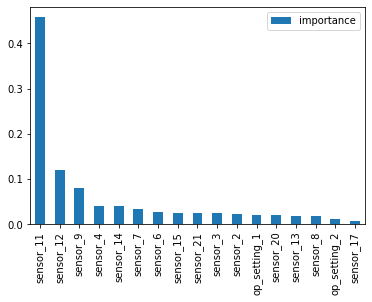

In [52]:
feature_importance_cluster1_rf_fe_im.sort_values("importance", ascending=False).plot(kind="bar")

In [53]:
#メモリを軽くする
import gc
 
del result_cluster1
del rf_cluster1
del rf_cluster1_fe_im
gc.collect()

20

# クロスバリデーションによるハイパーパラメータのチューニング 上記のfeature importanceで行う

In [54]:
#クロスバリデーションによるハイパーパラメータのチューニング
rf_cluster1_gscv_fe_im = RandomForestRegressor(random_state=1234)

In [55]:
params = {'n_estimators': [100, 150, 200], 'max_depth': [50, 100, 150]}

In [56]:
## 注意: scikit-learnのバージョンが、0.18以降の場合は、scoring='neg_mean_squared_error'とします
rf_cluster1_gscv_fe_im = GridSearchCV(rf_cluster1_gscv_fe_im, param_grid=params, verbose=1,
                    cv=3, scoring='neg_mean_squared_error')

# #注意: scikit-learnのバージョンが、0.17の場合は、scoring='mean_squared_error'とします
# import sklearn
# sklearn.__version__
# gscv = GridSearchCV(rf, param_grid=params, verbose=1,
#                     cv=3, scoring='mean_squared_error')

In [ ]:
rf_cluster1_gscv_fe_im.fit(X_train_all_cluster1_rf_fe_im, y_train_all_cluster1_rf_fe_im)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
rf_cluster1_gscv_fe_im.best_params_

In [ ]:
#ハイパーパラメータチューニング後学習を見てみましょう
rf_cluster1_gscv_fe_im_tu = RandomForestRegressor(n_estimators=200, max_depth=50, random_state=1234)
rf_cluster1_gscv_fe_im_tu.fit(X_train_all_cluster1_rf_fe_im, y_train_all_cluster1_rf_fe_im)


In [ ]:
#上記のrf_gscv_fe_im_tu_allで学習したモデルでtest_fe_imデータを予測する
train_data_cluster1['pred_rf_gscv_fe_im_tu_all'] = rf_cluster1_gscv_fe_im_tu.predict(X_train_all_cluster1_rf_fe_im)
test_data_cluster1['pred_rf_gscv_fe_im_tu_all'] = rf_cluster1_gscv_fe_im_tu.predict(X_test_cluster1_rf_fe_im)

In [ ]:
train_data_cluster1.head()

In [ ]:
test_data_cluster1.head()

In [ ]:
#結果表の作成 
train_data_cluster1 = train_data_cluster1.sort_values(['engine_no', 'time_in_cycles'])
test_data_cluster1 = test_data_cluster1.sort_values(['engine_no', 'time_in_cycles'])

#test_dataの各engineの最後のサイクルの行のみを表示　列は'engine_no', 'pred_rf_gscv_all'のみ
result_cluster1_rf_gscv_fe_im_tu = test_data_cluster1.groupby('engine_no').last().reset_index()[['engine_no', 'pred_rf_gscv_fe_im_tu_all']]



In [ ]:
result_cluster1_rf_gscv_fe_im_tu.head()

In [ ]:
# pred_rf_gscv_all<100の時、つまり予測した残りの寿命サイクルが100より小さければ1 それ以外で0とする
result_cluster1_rf_gscv_fe_im_tu['result'] = result_cluster1_rf_gscv_fe_im_tu['pred_rf_gscv_fe_im_tu_all']\
.map(lambda x: 0 if x > 100 else 1)

In [ ]:
result_cluster1_rf_gscv_fe_im_tu.head()

In [ ]:
#csvで結果の保存
result_cluster1_rf_gscv_fe_im_tu[['engine_no', 'result']].to_csv('Desktop/インテグ課題/NASA/cluster1_submission3.csv', index=False)

# 上記で読み込んだtest_data_RUL_cluster1を使っていく

In [ ]:
test_data_RUL_cluster1.head()

# train_allで学習しtestデータで出した予測値と、実際の答えで混合行列を作成

In [ ]:
print((result_cluster1_rf_gscv_fe_im_tu['result'] == 1).sum())
print((result_cluster1_rf_gscv_fe_im_tu['result'] == 0).sum())

In [ ]:
print((test_data_RUL_cluster1['result'] == 1).sum())
print((test_data_RUL_cluster1['result'] == 0).sum())

# 100以内に故障するを1,しないを0としている 故障することを当てたいから、故障する1をpositiveと定義する。

In [ ]:
#混合行列
#1 = Positive,0 = Negativeとする　なぜならば、再現率などがpositiveで計算されるので、故障するをpositiveにする
#labels指定をしないと、左から0,1表記になるので、TPが右下になってしまう。
cm = confusion_matrix(test_data_RUL_cluster1['result'],result_cluster1_rf_gscv_fe_im_tu['result'],labels=[1, 0] )

In [ ]:
cm

# 列が予測の1と0行が実際の1と0つまり、真陽性 : TP (True-Positive)233、真陰性: TN (True-Negative)177、偽陽性: FP (False-Positive)15(故障していないのにしていると予測)、偽陰性: FN (False-Negative)82(実際は故障しているのに故障していないと予測)
#https://pythondatascience.plavox.info/scikit-learn/%E5%88%86%E9%A1%9E%E7%B5%90%E6%9E%9C%E3%81%AE%E3%83%A2%E3%83%87%E3%83%AB%E8%A9%95%E4%BE%A1
#FN (False-Negative)82を少なくしたい　つまり実際は故障だが、故障しないと判断してしまっているものを

In [ ]:
#混合行列まとめて表示
cr = classification_report(test_data_RUL_cluster1['result'],result_cluster1_rf_gscv_fe_im_tu['result'],labels=[1, 0] )
print(cr)

# labelsを付けた時の計算が上記のまとめて表示の1の方　labelsをつけなかったときの計算が下の方

# #再現率を上げたい　実際の故障のうち故障と予測できたもの

In [ ]:
#特徴量の重要度を算出
feature_importances_cluster1_rf_gscv_fe_im_tu = rf_cluster1_gscv_fe_im_tu_all.feature_importances_


feature_importances_cluster1_rf_gscv_fe_im_tu = \
    pd.DataFrame(rf_cluster1_gscv_fe_im_tu_all.feature_importances_, columns=["importance"], index=selected_features)
feature_importances_cluster1_rf_gscv_fe_im_tu.sort_values("importance", ascending=False)

#全部足すと100% 縦軸で
#これでは重要度はわかるが、回帰のように上がる下がるなど関係性はわからない

In [ ]:
feature_importances_cluster1_rf_gscv_fe_im_tu.sort_values("importance", ascending=False).plot(kind="bar")

# 結果をtrain_data_cluster0_pred、test_data_cluster0_predとして出力する

In [196]:
#clusterごとに分けたデータの予測結果追加を出力
train_data_cluster1.to_csv('Desktop/インテグ課題/NASA/train_data/train_data_cluster1_pred.csv', index=False)
test_data_cluster1.to_csv('Desktop/インテグ課題/NASA/test_data/test_data_cluster1_pred.csv', index=False)

In [197]:
#clusterごとに分けたデータの予測結果追加を読み込み
train_data_cluster1_pred = pd.read_csv('Desktop/インテグ課題/NASA/train_data/train_data_cluster1_pred.csv')
test_data_cluster1_pred = pd.read_csv('Desktop/インテグ課題/NASA/test_data/test_data_cluster1_pred.csv')